In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


<h3>Four Peaks Problem</h3>

In [2]:
# Problem definition
length = 50

fitness = mlrose_hiive.OneMax()

problem = mlrose_hiive.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
experiment_name = "OneMax"
output_directory = "OneMax"

<h3>MIMC</h3>

In [3]:
%%time
problem = mlrose_hiive.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name=experiment_name + "_MIMIC",
                               output_directory=output_directory,
                          seed=33,
                          iteration_list=[200],
                          max_attempts=100,
                       population_sizes=[20, 50, 100],
                       keep_percent_list=[0.05, 0.1, 0.4, 0.80],
#                           population_sizes=[20,50,100],
#                           keep_percent_list=[0.25, 0.5, 0.75],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Wall time: 16.6 s


In [4]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.001466,25.0,20.0,True,20,0.05,200
1,1,0.026711,30.0,42.0,True,20,0.05,200
2,2,0.036954,30.0,63.0,True,20,0.05,200
3,3,0.047191,30.0,84.0,True,20,0.05,200
4,4,0.057331,30.0,105.0,True,20,0.05,200
...,...,...,...,...,...,...,...,...
1296,119,0.200834,47.0,12128.0,True,100,0.80,200
1297,120,0.210744,47.0,12229.0,True,100,0.80,200
1298,121,0.220220,47.0,12330.0,True,100,0.80,200
1299,122,0.230111,47.0,12431.0,True,100,0.80,200


In [5]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
50.0 39.833333333333336 1.3746700083333394
Keep Percent
0.05    36.000000
0.10    39.333333
0.40    43.666667
0.80    40.333333
Name: Fitness, dtype: float64
Population Size
20     33.5
50     40.0
100    46.0
Name: Fitness, dtype: float64
Population Size
20     1.025171
50     1.288222
100    1.810617
Name: Time, dtype: float64


In [6]:
best_index_in_mmc_curve = mmc_run_curves.Fitness.idxmax()
mmc_run_curves.iloc[best_index_in_mmc_curve]


Iteration                15
Time               0.167019
Fitness                50.0
FEvals               1623.0
use_fast_mimic         True
Population Size         100
Keep Percent            0.4
max_iters               200
Name: 1076, dtype: object

In [7]:
best_p_size = mmc_run_curves.iloc[best_index_in_mmc_curve]['Population Size'] 
best_keep = mmc_run_curves.iloc[best_index_in_mmc_curve]['Keep Percent']  
best_curve_mmc = mmc_run_curves.loc[mmc_run_curves['Population Size'] == best_p_size, :]
best_curve_mmc = best_curve_mmc.loc[best_curve_mmc['Keep Percent'] == best_keep, :]
best_curve_mmc.reset_index(inplace=True)
best_p_size, best_keep


(100, 0.4)

Text(0, 0.5, 'Value')

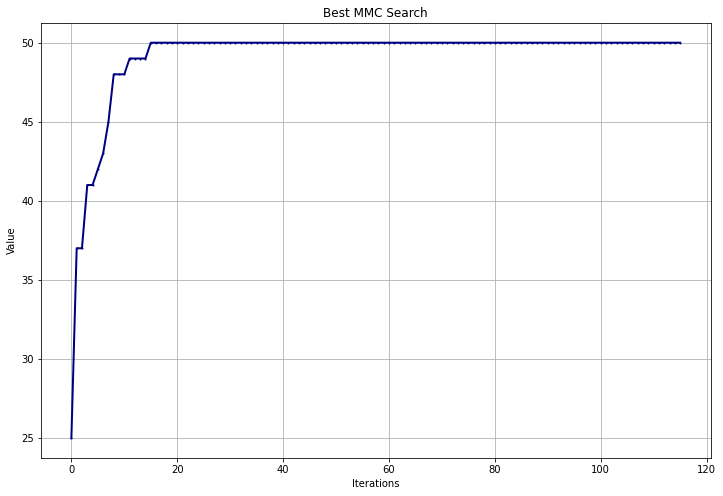

In [8]:
ax = best_curve_mmc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best MMC Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [9]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.001466,25.0,20.0,True,20,0.05,200
1,1,0.026711,30.0,42.0,True,20,0.05,200
2,2,0.036954,30.0,63.0,True,20,0.05,200
3,3,0.047191,30.0,84.0,True,20,0.05,200
4,4,0.057331,30.0,105.0,True,20,0.05,200
...,...,...,...,...,...,...,...,...
1296,119,0.200834,47.0,12128.0,True,100,0.80,200
1297,120,0.210744,47.0,12229.0,True,100,0.80,200
1298,121,0.220220,47.0,12330.0,True,100,0.80,200
1299,122,0.230111,47.0,12431.0,True,100,0.80,200


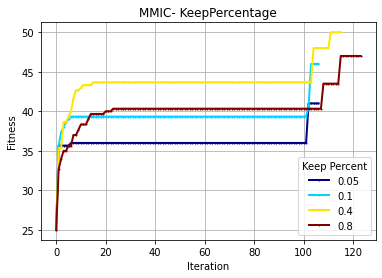

In [10]:
mmc_kp = mmc_run_curves.groupby(['Iteration','Keep Percent']).agg({'Fitness':'mean'}).reset_index()
ax = mmc_kp.pivot_table(values="Fitness", index="Iteration", columns="Keep Percent").plot(lw=2, colormap='jet', 
                                                                                          grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='MMIC- KeepPercentage')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/One/one_mmc_k_pct.png')

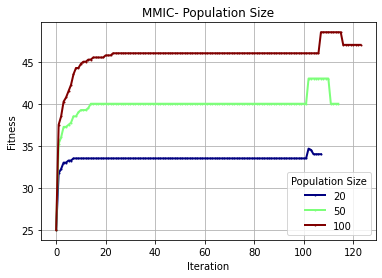

In [11]:
mmc_p = mmc_run_curves.groupby(['Iteration','Population Size']).agg({'Fitness':'mean'}).reset_index()
ax = mmc_p.pivot_table(values="Fitness", index="Iteration", columns="Population Size").plot(lw=2, colormap='jet', 
                                                                                          grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='MMIC- Population Size')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/One/one_mmc_p_sizet.png')

<h3> RHC </h3>

In [59]:
%%time

problem = mlrose_hiive.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
runner_return = mlrose_hiive.RHCRunner(problem,
                                       experiment_name=experiment_name+ "_RHC",
                                       output_directory=output_directory,
                                       iteration_list=[500],
                                       seed=33,
                                       restart_list=[10], max_attempts=100)
rhc_run_stats, rhc_run_curves = runner_return.run()

Wall time: 2.85 s


In [60]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000209,25.0,0.0,10,500,0
1,1,0.007601,26.0,2.0,10,500,0
2,2,0.007647,27.0,4.0,10,500,0
3,3,0.007676,27.0,5.0,10,500,0
4,4,0.007705,27.0,6.0,10,500,0
...,...,...,...,...,...,...,...
3182,272,0.033634,50.0,3459.0,10,500,10
3183,273,0.033953,50.0,3460.0,10,500,10
3184,274,0.034260,50.0,3461.0,10,500,10
3185,275,0.034767,50.0,3462.0,10,500,10


In [61]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve_rhc = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve_rhc.reset_index(inplace=True)
best_decay

0.0

In [62]:
best_decay

0.0

In [63]:
rhc_run_curves.iloc[best_index_in_curve].current_restart

0.0

In [64]:
best_index_in_RHC_curve = rhc_run_curves.Fitness.idxmax()
rhc_run_curves.iloc[best_index_in_RHC_curve]

Iteration          178.000000
Time                 0.020611
Fitness             50.000000
FEvals             203.000000
Restarts            10.000000
max_iters          500.000000
current_restart      0.000000
Name: 178, dtype: float64

In [65]:
best_curve_rhc

,index,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0,0.000209,25.0,0.0,10,500,0
1,1,1,0.007601,26.0,2.0,10,500,0
2,2,2,0.007647,27.0,4.0,10,500,0
3,3,3,0.007676,27.0,5.0,10,500,0
4,4,4,0.007705,27.0,6.0,10,500,0
...,...,...,...,...,...,...,...,...
274,274,274,0.034260,50.0,299.0,10,500,0
275,275,275,0.034767,50.0,300.0,10,500,0
276,276,276,0.035132,50.0,301.0,10,500,0
277,277,277,0.035478,50.0,302.0,10,500,0


Text(0, 0.5, 'Value')

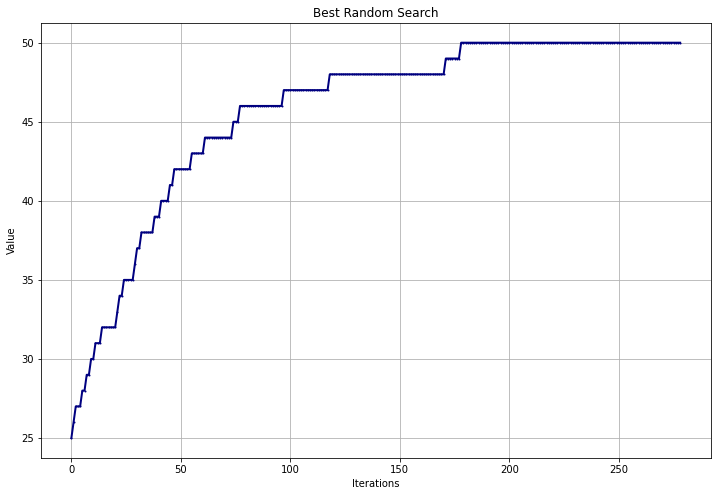

In [66]:
ax = best_curve_rhc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [67]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000209,25.0,0.0,10,500,0
1,1,0.007601,26.0,2.0,10,500,0
2,2,0.007647,27.0,4.0,10,500,0
3,3,0.007676,27.0,5.0,10,500,0
4,4,0.007705,27.0,6.0,10,500,0
...,...,...,...,...,...,...,...
3182,272,0.033634,50.0,3459.0,10,500,10
3183,273,0.033953,50.0,3460.0,10,500,10
3184,274,0.034260,50.0,3461.0,10,500,10
3185,275,0.034767,50.0,3462.0,10,500,10


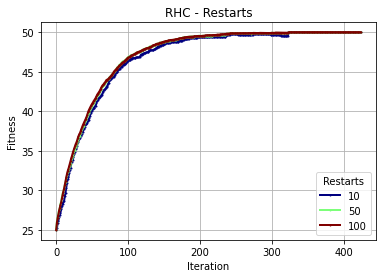

In [19]:
rhc_cr = rhc_run_curves.groupby(['Iteration','Restarts']).agg({'Fitness':'mean'}).reset_index()
ax = rhc_cr.pivot_table(values="Fitness", index="Iteration", columns="Restarts").plot(lw=2, colormap='jet', legend=True
                                                                                          , grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='RHC - Restarts')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
# fig.savefig('../images/One/one_rhc_restarts.png')

<h3>SA</h3>

In [20]:
%%time

problem = mlrose_hiive.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)

sa = mlrose_hiive.SARunner(problem,
                            experiment_name=experiment_name+ "_SA",
                            output_directory=output_directory, 
                           iteration_list=[500],
                           temperature_list=[0.05, 1, 5, 10, 50, 100],
                   decay_list=[mlrose_hiive.GeomDecay, mlrose_hiive.ExpDecay, mlrose_hiive.ArithDecay],
#                            temperature_list=[1, 10, 50, 100, 250],
#                            decay_list=[mlrose_hiive.ExpDecay,
#                                        mlrose_hiive.GeomDecay],
                           seed=33, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Wall time: 2.28 s


In [21]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

39.333333333333336 50.0
0.09608025555554099


In [22]:
print(last_iters.loc[last_iters.schedule_init_temp == 0.05, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 0.1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 0.5, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 20, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 25, "Time"].mean())
print(last_iters.loc[:, "Time"].mean())

0.024354833333328923
nan
nan
0.07735893333331963
0.10584476666667797
nan
nan
0.09608025555554099


In [23]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve_sa = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve_sa.reset_index(inplace=True)
best_decay

GeomDecay(init_temp=1, decay=0.99, min_temp=0.001)

In [24]:
best_index_in_SA_curve = sa_run_curves.Fitness.idxmax()
sa_run_curves.iloc[best_index_in_SA_curve]

Iteration           154
Time           0.019075
Fitness            50.0
FEvals            203.0
Temperature           1
max_iters           500
Name: 787, dtype: object

In [25]:
dfp = pd.DataFrame(sa_run_curves)
dfp = dfp.astype({'Temperature':'string'})

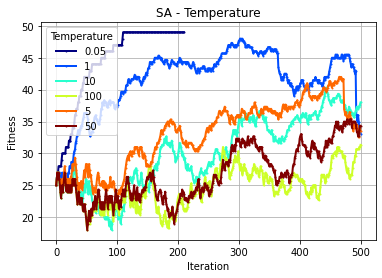

In [26]:
sa_ps = dfp.groupby(['Iteration','Temperature']).agg({'Fitness':'mean'}).reset_index()
ax = sa_ps.pivot_table(values="Fitness", index="Iteration", columns="Temperature").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='SA - Temperature')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/One/one_sa_temp.png')

Text(0, 0.5, 'Value')

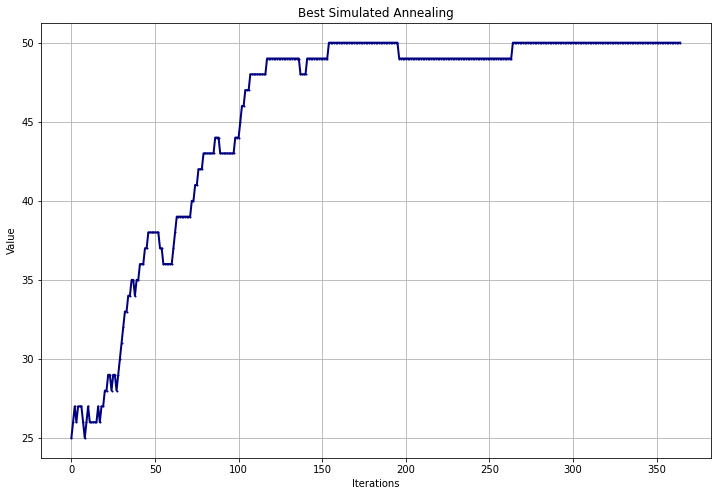

In [27]:
ax = best_curve_sa.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

<h3>GA</h3>

In [28]:
%%time
problem = mlrose_hiive.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
ga = mlrose_hiive.GARunner(problem=problem,
                        experiment_name=experiment_name+ "_GA",
                        output_directory=output_directory,
                          seed=44,
                          iteration_list=[200],
                          population_sizes=[20,50,100],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Wall time: 6.45 s


In [29]:

last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
50.0 50.0 0.7037652333333553
Mutation Rate
0.10    50.0
0.25    50.0
0.50    50.0
Name: Fitness, dtype: float64
Population Size
20     50.0
50     50.0
100    50.0
Name: Fitness, dtype: float64
Population Size
20     0.267794
50     0.616009
100    1.227493
Name: Time, dtype: float64


In [30]:
best_index_in_GA_curve = ga_run_curves.Fitness.idxmax()
ga_run_curves.iloc[best_index_in_GA_curve]


Iteration            87.000000
Time                  0.118353
Fitness              50.000000
FEvals             1856.000000
Population Size      20.000000
Mutation Rate         0.100000
max_iters           200.000000
Name: 87, dtype: float64

In [31]:
best_p_size_ga = ga_run_curves.iloc[best_index_in_GA_curve]['Population Size'] 
best_m_rate = ga_run_curves.iloc[best_index_in_GA_curve]['Mutation Rate']  
best_curve_ga = ga_run_curves.loc[ga_run_curves['Population Size'] == best_p_size_ga, :]
best_curve_ga = best_curve_ga.loc[best_curve_ga['Mutation Rate'] == best_m_rate, :]
best_curve_ga.reset_index(inplace=True)
best_p_size_ga

20.0

Text(0, 0.5, 'Value')

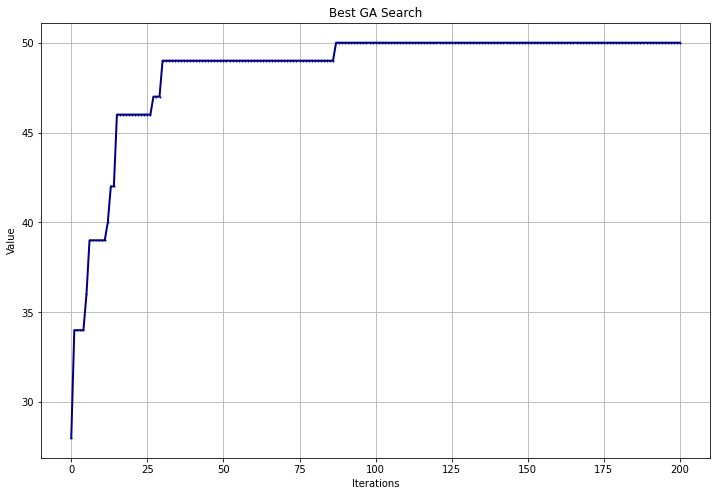

In [32]:
ax = best_curve_ga.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best GA Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [33]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000891,28.0,20.0,20,0.1,200
1,1,0.009372,34.0,42.0,20,0.1,200
2,2,0.010682,34.0,63.0,20,0.1,200
3,3,0.011907,34.0,84.0,20,0.1,200
4,4,0.013116,34.0,105.0,20,0.1,200
...,...,...,...,...,...,...,...
1804,196,0.260767,50.0,19906.0,100,0.5,200
1805,197,0.262039,50.0,20007.0,100,0.5,200
1806,198,0.263340,50.0,20108.0,100,0.5,200
1807,199,0.264758,50.0,20209.0,100,0.5,200


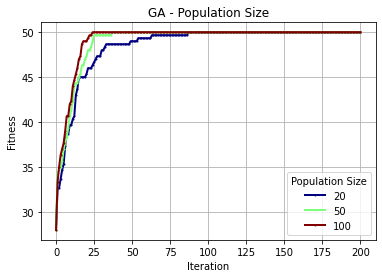

In [34]:
ga_ps = ga_run_curves.groupby(['Iteration','Population Size']).agg({'Fitness':'mean'}).reset_index()
ax = ga_ps.pivot_table(values="Fitness", index="Iteration", columns="Population Size").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='GA - Population Size')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/One/one_ga_p_size.png')

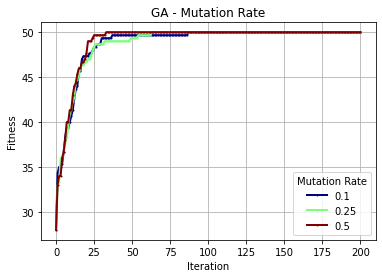

In [35]:
ga_mutaion = ga_run_curves.groupby(['Iteration','Mutation Rate']).agg({'Fitness':'mean'}).reset_index()
ax = ga_mutaion.pivot_table(values="Fitness", index="Iteration", columns="Mutation Rate").plot(lw=2, colormap='jet', 
                                                                                             grid=1, marker='.', 
                                                                                          markersize=2,
                                                                                          title='GA - Mutation Rate')
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
fig = ax.get_figure()
fig.savefig('../images/One/one_ga_M_Rate.png')

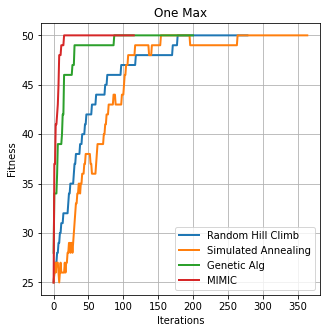

In [68]:
all_curves = {"Random Hill Climb": best_curve_rhc.Fitness, "Simulated Annealing": best_curve_sa.Fitness, "Genetic Alg": best_curve_ga.Fitness, "MIMIC": best_curve_mmc.Fitness}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("One Max")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.grid(visible=True)
plt.savefig('../images/One/one_f_score_compare.png')
plt.show()

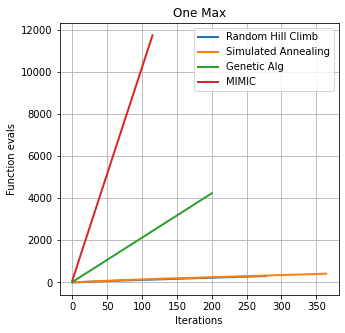

In [69]:
all_curves = {"Random Hill Climb": best_curve_rhc.FEvals, "Simulated Annealing": best_curve_sa.FEvals, "Genetic Alg": best_curve_ga.FEvals, "MIMIC": best_curve_mmc.FEvals}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Function evals")
plt.title("One Max")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.grid(visible=True)
plt.savefig('../images/One/one_f_evals_compare.png')
plt.show()

In [38]:
def train_and_time(algo, times, fitness):
    start = time.clock()
    #print(algo())
    best_state, best_fitness,_ = algo()
    end = time.clock()
    times.append(end - start)
    fitness.append(best_fitness)

One Max Problem with  10  points
One Max Problem with  15  points
One Max Problem with  20  points
One Max Problem with  25  points
One Max Problem with  30  points
One Max Problem with  35  points
One Max Problem with  40  points
One Max Problem with  45  points


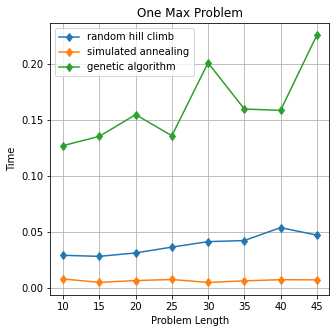

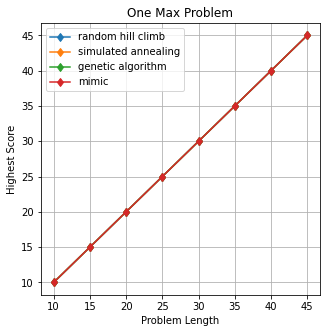

In [74]:
####### One Max

import time 

cp_hill_times = []
cp_hill_scores = []
cp_anneal_times = []
cp_anneal_scores = []
cp_genetic_times = []
cp_genetic_scores = []
cp_mimic_times = []
cp_mimic_scores = []

# def run_One_Max(num_points):
#     one_max = mlrose_hiive.DiscreteOpt(length = num_points,fitness_fn = mlrose_hiive.OneMax())
#     print ("One Max Problem with ", num_points, " points")
#     train_and_time(lambda : mlrose_hiive.random_hill_climb(problem=one_max, max_attempts=10),cp_hill_times, cp_hill_scores)
#     train_and_time(lambda : mlrose_hiive.simulated_annealing(problem=one_max, max_attempts=10), cp_anneal_times, cp_anneal_scores)
#     train_and_time(lambda : mlrose_hiive.genetic_alg(pop_size = 30, problem=one_max, max_attempts=10), cp_genetic_times, cp_genetic_scores)
#     train_and_time(lambda : mlrose_hiive.mimic(pop_size = 30, problem=one_max, max_attempts=10), cp_mimic_times, cp_mimic_scores)

def run_One_Max(num_points):
    print ("One Max Problem with ", num_points, " points")
    
    one_max = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = mlrose_hiive.OneMax())
    train_and_time(lambda : mlrose_hiive.random_hill_climb(problem=one_max, restarts =10, max_iters= 500, max_attempts= 100, random_state=33),cp_hill_times, cp_hill_scores)
    
    one_max = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = mlrose_hiive.OneMax())
    train_and_time(lambda : mlrose_hiive.simulated_annealing(problem=one_max, schedule= mlrose_hiive.GeomDecay(init_temp=1),max_iters=500, max_attempts= 100, random_state=33), cp_anneal_times, cp_anneal_scores)
    
    one_max = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = mlrose_hiive.OneMax())
    train_and_time(lambda : mlrose_hiive.genetic_alg(problem=one_max, pop_size = 20, mutation_prob=0.1, max_iters=200, max_attempts= 100, random_state=33), cp_genetic_times, cp_genetic_scores)
    
    one_max = mlrose_hiive.DiscreteOpt(length = num_points, fitness_fn = mlrose_hiive.OneMax())
    train_and_time(lambda : mlrose_hiive.mimic(problem=one_max, pop_size = 200, keep_pct= 0.4, max_iters=200, max_attempts= 100, random_state=33), cp_mimic_times, cp_mimic_scores)

point_range = range(10,50,5)
for p in point_range:
    run_One_Max(p)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(point_range,cp_hill_times,'-d',point_range,cp_anneal_times,'-d',point_range,cp_genetic_times,'-d')
plt.title("One Max Problem")
plt.xlabel("Problem Length")
plt.ylabel("Time")
plt.grid(visible=True)
plt.legend(["random hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.savefig('../images/One/one_h_time.png')
plt.show()

plt.plot(point_range,cp_hill_scores,'-d',point_range,cp_anneal_scores,'-d',point_range,cp_genetic_scores,'-d',point_range,cp_mimic_scores,'-d')
plt.title("One Max Problem")
plt.xlabel("Problem Length")
plt.ylabel("Highest Score")
plt.grid(visible=True)

plt.legend(["random hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.savefig('../images/One/one_h_score.png')
plt.show()